In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#df=pd.read_csv('sample_data/california_housing_test.csv')
# Sample DataFrame
df = pd.DataFrame({
    'yr_built': [2000, 2000, 2001, 2001, 2002, 2002],
    'waterfront': ['Yes', 'No', 'Yes', np.nan, 'Yes', 'No'],
    'price': [500000, 400000, 600000, 450000, np.NaN, 420000],
    'view': ['No', 'No', 'Mountain', 'Skyline', 'No', np.nan],
    'sqft_living': [np.nan, 3200, 4500, 3500, 4000, 4200],
    'bedrooms': [3, 3, 4, 4, 3, 2]
})

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [74]:
df = df.drop(axis=0,columns=['zipcode','lat','long'])
df = df.drop(axis=0,columns=['id'])
df['price'] = df['price']/1000

In [16]:
df.head()

,yr_built,waterfront,price,view,sqft_living,bedrooms
0,2000,Yes,500000.0,No,NaN,3
1,2000,No,400000.0,No,3200.0,3
2,2001,Yes,600000.0,Mountain,4500.0,4
3,2001,NaN,450000.0,Skyline,3500.0,4
4,2002,Yes,NaN,No,4000.0,3


In [17]:
df.describe(include='all')

,yr_built,waterfront,price,view,sqft_living,bedrooms
count,6.000000,5,5.000000,5,5.000000,6.000000
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,Yes,NaN,No,NaN,NaN
freq,NaN,3,NaN,3,NaN,NaN
mean,2001.000000,NaN,474000.000000,NaN,3880.000000,3.166667
std,0.894427,NaN,79874.902191,NaN,526.307895,0.752773
min,2000.000000,NaN,400000.000000,NaN,3200.000000,2.000000
25%,2000.250000,NaN,420000.000000,NaN,3500.000000,3.000000
50%,2001.000000,NaN,450000.000000,NaN,4000.000000,3.000000
75%,2001.750000,NaN,500000.000000,NaN,4200.000000,3.750000


In [137]:
df.nunique()
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
print(df.nunique())
a=df.nunique()
for i in a[a<10].index:
    print('{0} unique values for {1} - {2} ' .format(a[i],i, np.sort(df[i].unique())))
#print(np.sort(df['bedrooms'].unique()))

longitude              607
latitude               587
housing_median_age      52
total_rooms           2215
total_bedrooms        1055
population            1802
households            1026
median_income         2578
median_house_value    1784
dtype: int64


In [35]:
df.groupby('bedrooms')['price'].agg(['mean','count'])

,mean,count
bedrooms,,
0,409.503846,13
1,317.642884,199
2,401.372682,2760
3,466.232078,9824
4,635.419504,6882
5,786.599829,1601
6,825.520636,272
7,951.184658,38
8,1105.076923,13


In [75]:
df=df[df['bedrooms']<=8]
df=df[df['bedrooms']!=0]

<Axes: xlabel='bedrooms', ylabel='count'>

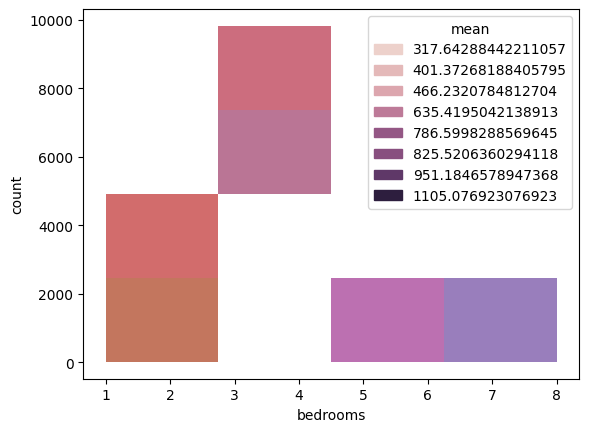

In [49]:
#df.groupby('bedrooms').size()
#
rpt=df.groupby('bedrooms')['price'].agg(['mean','count'])
sns.histplot(rpt, x='bedrooms', y='count', hue='mean')



In [50]:
df.groupby('bathrooms')['price'].agg(['mean','count'])

,mean,count
bathrooms,,
0.00,279.666667,3
0.50,237.375000,4
0.75,294.936648,71
1.00,347.072147,3851
1.25,621.216667,9
1.50,409.406167,1445
1.75,454.835347,3047
2.00,457.790128,1929
2.25,533.676774,2047


In [76]:
df=df[df['bathrooms']>0.0]

<Axes: xlabel='sqft_living', ylabel='Count'>

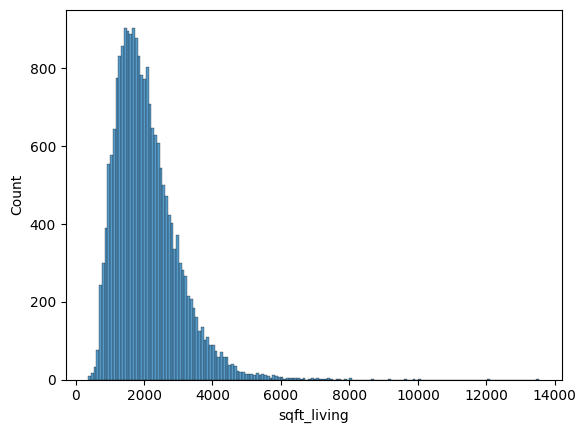

In [77]:
sns.histplot(df, x='sqft_living')

In [80]:
#df['sqft_living'].quantile(0.99)  --4980.0
df=df[df['sqft_living'] <df['sqft_living'].quantile(0.999)]

<Axes: xlabel='sqft_living', ylabel='Count'>

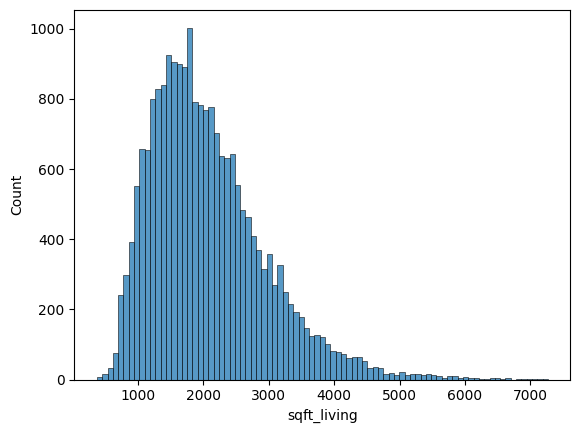

In [81]:
#outliers=df[df['sqft_living'] >df['sqft_living'].quantile(0.99)]
#sns.histplot(outliers, x='sqft_living',y='price')
sns.histplot(df, x='sqft_living')


([<matplotlib.patches.Wedge at 0x7fdf8dd274f0>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.0991519398395244, 0.04318579797816317, ''),
  Text(1.0966090670054351, 0.08630500658402883, ''),
  Text(1.0966090670054351, 0.08630500658402883, ''),
  Text(1.0923753024234482, 0.12929113912128812, ''),
  Text(1.0864571742518743, 0.1720779140872905, ''),
  Text(1.0864571742518743, 0.1720779140872905, ''),
  Text(1.0864571742518743, 0.1720779140872905, ''),
  Text(1.078863807815671, 0.21459935737431984, ''),
  Text(1.0696069115358542, 0.25678990399688945, ''),
  Text(1.0696069115358542, 0.25678990399688945, ''),
  Text(1.0696069115358542, 0.25678990399688945, ''),
  Text(1.0696069115358542, 0.25678990399688945, ''),
  Text(1.0587007588759592, 0.2985844991882007, ''),
  Text(1.0461621663333946, 0.3399186987098808, ''),
  Text(1.0320104675096227, 0.38072876822033064, ''),
  Text(1.0162674832991436, 0.4209517815484631, ''),
  Text(1.01626748329914

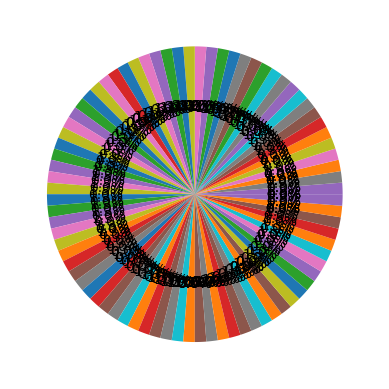

In [189]:
yrprice = df.groupby(['yr_built','waterfront'])[['price','view']].agg(['mean','count']).reset_index()
#yrprice.columns.values
yrprice.columns = ['_'.join(filter(None, col)).strip() for col in yrprice.columns.values]
yrprice
plt.pie(yrprice['waterfront'],  autopct='%1.1f%%')
#plt.show()
#ns.histplot(yrprice, x='yr_built', y='mean', hue='waterfront', kde=True)
#outliers=df[df['sqft_lot'] > df['sqft_lot'].quantile(0.999)]
#sns.histplot(outliers, x='sqft_lot',y='price')

<Axes: >

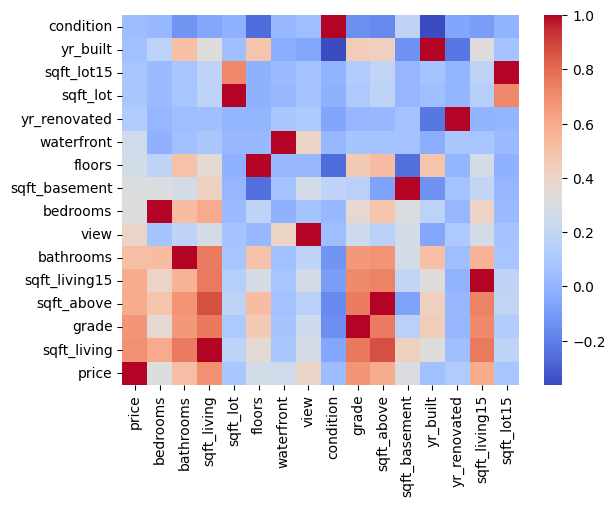

In [95]:
sns.heatmap(df.select_dtypes(include='number').corr().sort_values('price'), cmap='coolwarm')

<Axes: xlabel='sqft_living', ylabel='price'>

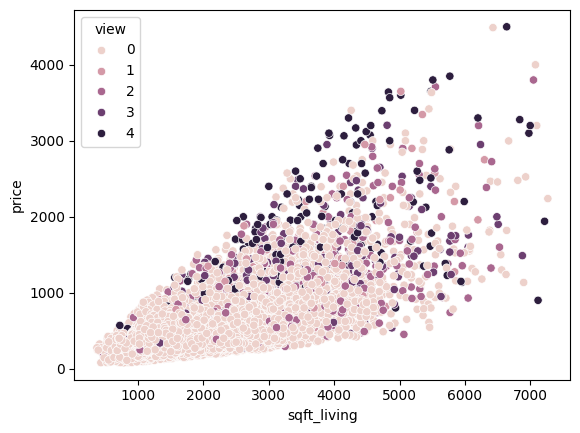

In [100]:
sns.scatterplot(df, x='sqft_living', y='price', hue='view')

<Axes: xlabel='date', ylabel='price'>

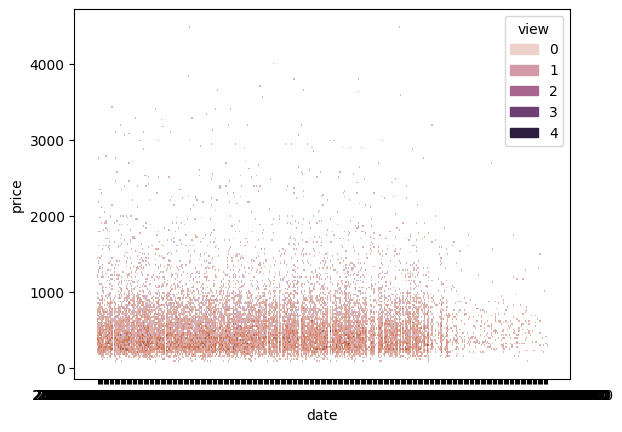

In [102]:
sns.histplot(df, x='date', y='price', hue='view')

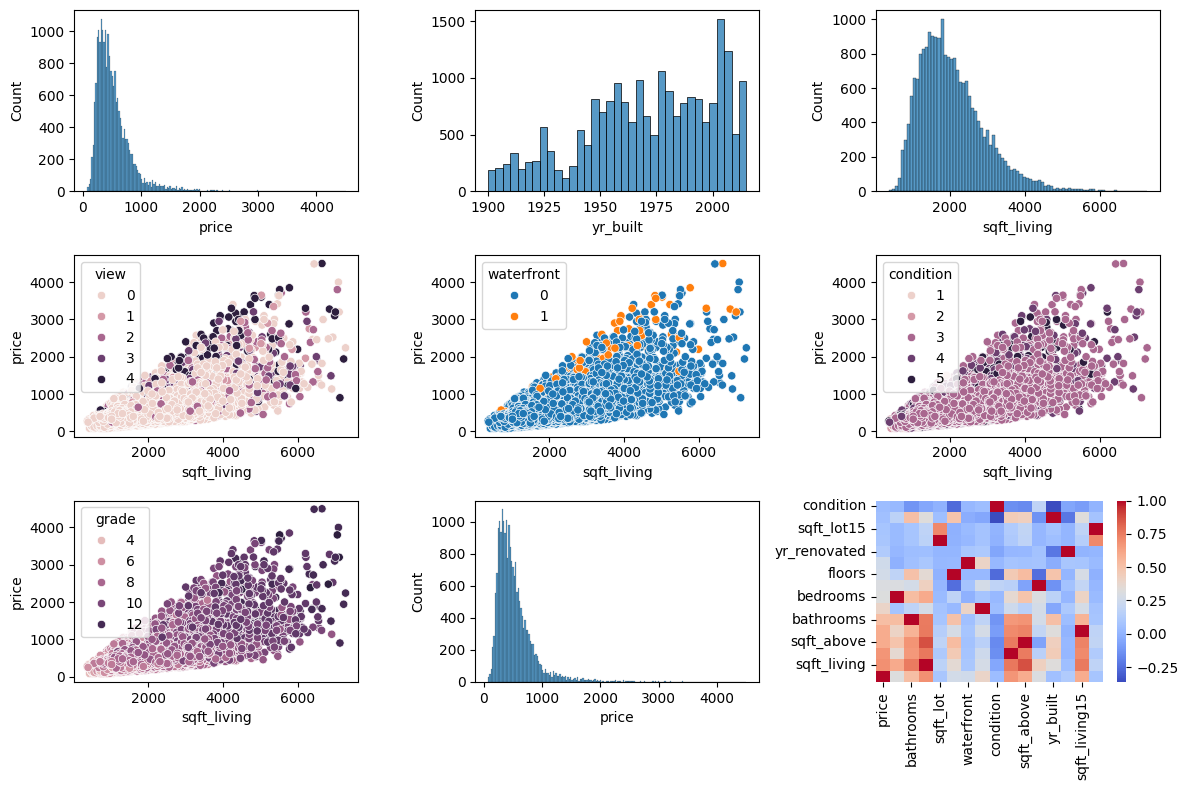

In [105]:
fig, axes = plt.subplots(3,3,figsize=(12,8))
sns.histplot(df, x='price', ax=axes[0,0])
sns.histplot(df, x='yr_built', ax=axes[0,1])
sns.histplot(df, x='sqft_living', ax=axes[0,2])
sns.scatterplot(df, x='sqft_living', y='price', hue='view', ax=axes[1,0])
sns.scatterplot(df, x='sqft_living', y='price', hue='waterfront', ax=axes[1,1])
sns.scatterplot(df, x='sqft_living', y='price', hue='condition', ax=axes[1,2])
sns.scatterplot(df, x='sqft_living', y='price', hue='grade', ax=axes[2,0])
sns.histplot(df, x='price', ax=axes[2,1])
sns.heatmap(df.select_dtypes(include='number').corr().sort_values('price') , cmap='coolwarm', ax=axes[2,2])

plt.tight_layout()
plt.show()

In [190]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221.9,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [235]:
from sklearn.preprocessing import OneHotEncoder
encode= OneHotEncoder()
x=encode.fit_transform(df[['condition']])

In [237]:
encoded_df = pd.DataFrame(x.toarray(), columns=encode.get_feature_names_out([ 'condition']))
encoded_df.columns

Index(['condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')

In [238]:
encode.get_feature_names_out([ 'condition'])

array(['condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'], dtype=object)

In [239]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("OnehotEncoder", OneHotEncoder(), ['condition']),
    ("StandardScaler", StandardScaler(),['price'])
])

In [240]:
y=preprocessor.fit_transform(df)

In [225]:
x[0].toarray()

array([[0., 0., 1., 0., 0.]])

In [220]:
y[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
       -0.90568251])

In [241]:
preprocessor.get_feature_names_out([ 'condition'])

ValueError: input_features is not equal to feature_names_in_

In [217]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221.9,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650


In [ ]:
#df=pd.read_csv('sample_data/california_housing_test.csv')
# Sample DataFrame
df = pd.DataFrame({
    'yr_built': [2000, 2000, 2001, 2001, 2002, 2002],
    'waterfront': ['Yes', 'No', 'Yes', np.nan, 'Yes', 'No'],
    'price': [500000, 400000, 600000, 450000, np.NaN, 420000],
    'view': ['No', 'No', 'Mountain', 'Skyline', 'No', np.nan],
    'sqft_living': [np.nan, 3200, 4500, 3500, 4000, 4200],
    'bedrooms': [3, 3, 4, 4, 3, 2]
})

In [18]:
df.head()

,yr_built,waterfront,price,view,sqft_living,bedrooms
0,2000,Yes,500000.0,No,NaN,3
1,2000,No,400000.0,No,3200.0,3
2,2001,Yes,600000.0,Mountain,4500.0,4
3,2001,NaN,450000.0,Skyline,3500.0,4
4,2002,Yes,NaN,No,4000.0,3


In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_features = ['sqft_living','bedrooms','price']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ,('scaler', StandardScaler())
])

categorical_features = ['waterfront','view']
categorical_transformer = Pipeline(steps= [
    ('impute', SimpleImputer(strategy='most_frequent'))
    ,('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [49]:
df_transformed = preprocessor.fit_transform(df)  #apply imputer & other preprocessing

# Convert the transformed data back to a DataFrame
categorical_feature_names_onehot =  preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(categorical_feature_names_onehot)

df_transformed = pd.DataFrame(df_transformed, columns=feature_names)  # Create the transformed DataFrame
df_not_transformed = df.drop(columns=numeric_features + categorical_features).reset_index(drop=True)  # Combine with the remaining columns
df_final = pd.concat([df_not_transformed, df_transformed], axis=1)
df_final.head(10)

,yr_built,sqft_living,bedrooms,price,waterfront_No,waterfront_Yes,view_Mountain,view_No,view_Skyline
0,2000,0.231455,-0.242536,0.455733,0.0,1.0,0.0,1.0,0.0
1,2000,-1.620185,-0.242536,-1.063376,1.0,0.0,0.0,1.0,0.0
2,2001,1.388730,1.212678,1.974842,0.0,1.0,1.0,0.0,0.0
3,2001,-0.925820,1.212678,-0.303822,0.0,1.0,0.0,0.0,1.0
4,2002,0.231455,-0.242536,-0.303822,0.0,1.0,0.0,1.0,0.0
5,2002,0.694365,-1.697749,-0.759555,1.0,0.0,0.0,1.0,0.0


In [34]:
df

,yr_built,waterfront,price,view,sqft_living,bedrooms
0,2000,Yes,500000.0,No,NaN,3
1,2000,No,400000.0,No,3200.0,3
2,2001,Yes,600000.0,Mountain,4500.0,4
3,2001,NaN,450000.0,Skyline,3500.0,4
4,2002,Yes,NaN,No,4000.0,3
5,2002,No,420000.0,NaN,4200.0,2
